In [30]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

#Preparing the data for processing

#creating dataframe for copper with nano coating
#superheat temperature
CuPdT=np.array([72.40704, 71.10017, 68.97078, 66.61751, 64.08479, 60.74023, 54.43071, 45.65994, 37.83159, 31.28086, 25.83957, 21.364, 17.69793, 14.88374, 12.66149, 10.85478, 9.529446, 8.609713, 7.790826, 7.306428, 6.665404, 6.195496, 5.902143, 5.638786])
#heat flux
Cuq=np.array([6.6269, 8.4672, 10.02, 11.579, 13.376, 17.513, 28.068, 41.091, 46.072, 47.085, 42.897, 36.914, 30.965, 23.28, 17.433, 12.823, 9.447, 7.042, 5.352, 4.182, 3.344, 2.773, 2.258, 1.862])

CuP={'dT': CuPdT.tolist(),
     'q': Cuq.tolist()}

dfCuP=pd.DataFrame(CuP, columns=['q','dT'])


#creating dataframe for copper with nano coating
#superheat temperature
CuNdT=np.array([59.62617107, 55.64625709, 49.25617399, 42.25567956, 35.95063683, 30.64195807, 26.30468767, 22.5830269, 19.63947259, 17.20142809, 15.30240145, 13.47199512, 12.01536863, 10.81286203, 9.706640891, 8.889856847, 8.168731217, 7.618664801, 7.172672996, 6.663560068, 6.205403771, 5.866599029, 5.594729712, 5.317489446, 5.099367698])
#heat flux
CuNq=np.array([6.032, 20.009, 44.71, 66.505, 77.331, 78.535, 74.93, 66.786, 56.826, 47.898, 39.346, 32.231, 26.624, 22.275, 18.516, 15.945, 13.782, 11.645, 10.174, 8.325, 7.372, 6.3, 5.36, 4.951, 4.219])

CuN={'dT': CuNdT.tolist(),
     'q': CuNq.tolist()}
    
dfCuN=pd.DataFrame(CuN, columns=['q','dT'])

#creating dataframe for plane Aluminum
#superheat temperature
AlPdT=np.array([59.26537, 55.48475, 51.17239, 46.5946, 41.85994, 37.19834, 32.95427, 28.94159, 25.18407, 21.88755, 19.0159, 16.50307, 14.50592, 12.65392, 11.1548, 9.814904, 8.751415, 7.868639, 7.121047, 6.542312, 6.023217])
#Heat flux
Alq=np.array([22.20092, 38.55384, 45.88544, 47.17718, 45.38837, 42.6716, 39.1973, 36.12405, 33.18834, 30.1666, 26.93744, 22.94232, 19.48176, 16.54108, 14.03877, 12.18961, 10.30799, 8.830249, 7.522769, 6.447961, 5.512758])

AlP={'dT': AlPdT.tolist(),
     'q': Alq.tolist()}

dfAlP=pd.DataFrame(AlP, columns=['q','dT'])

#creating dataframe for Aluminum with nano coating
#superheat temperature
AlNdT=np.array([64.5774882, 56.7100587, 48.6706631, 41.5980008, 35.5826658, 30.5508967, 26.6204239, 23.4450393, 20.8737279, 18.749954, 16.951414, 15.4714771, 14.2563868, 13.2151452, 12.3045772, 11.5336639, 10.8288597, 10.2194144, 9.68749447, 9.2075748, 8.79153423, 8.40384187])
#heat flux
AlNq=np.array([20.9809233, 57.6925765, 71.5818239, 67.54756, 59.9970482, 50.5416674, 41.0311739, 33.9732047, 27.6191982, 22.7323589, 18.8425034, 15.6918866, 13.0517787, 11.1406004, 9.656973, 8.10700753, 7.32281073, 6.13342328, 5.41011967, 4.85147497, 4.29891155, 3.8000111])

AlN={'dT': AlNdT.tolist(),
     'q': AlNq.tolist()}

dfAlN=pd.DataFrame(AlN, columns=['q','dT'])

In [26]:
# assigning k values

dfCuP['k']=[490 for n in range(len(dfCuP))]
dfCuN['k']=[490 for n in range(len(dfCuN))]
dfAlP['k']=[147 for n in range(len(dfAlP))]
dfAlN['k']=[147 for n in range(len(dfAlN))]

# assigning n1 values

dfCuP['n1']=[0.01128 for n in range(len(dfCuP))]
dfCuN['n1']=[0.11039 for n in range(len(dfCuN))]
dfAlP['n1']=[0.3376 for n in range(len(dfAlP))]
dfAlN['n1']=[0.02647 for n in range(len(dfAlN))]

# assigning n2 values

dfCuP['n2']=[2.984 for n in range(len(dfCuP))]
dfCuN['n2']=[2.2767 for n in range(len(dfCuN))]
dfAlP['n2']=[1.570 for n in range(len(dfAlP))]
dfAlN['n2']=[2.3429 for n in range(len(dfAlN))]

# assigning theta values

dfCuP['theta']=[47 for n in range(len(dfCuP))]
dfCuN['theta']=[7 for n in range(len(dfCuN))]
dfAlP['theta']=[36 for n in range(len(dfAlP))]
dfAlN['theta']=[8 for n in range(len(dfAlN))]

# assigning n1xdT^n2

dfCuP['q_']=[dfCuP['n1'][n]*dfCuP['dT'][n]**dfCuP['n2'][n] for n in range(len(dfCuP))]
dfCuN['q_']=[dfCuN['n1'][n]*dfCuN['dT'][n]**dfCuN['n2'][n] for n in range(len(dfCuN))]
dfAlP['q_']=[dfAlP['n1'][n]*dfAlP['dT'][n]**dfAlP['n2'][n] for n in range(len(dfAlP))]
dfAlN['q_']=[dfAlN['n1'][n]*dfAlN['dT'][n]**dfAlN['n2'][n] for n in range(len(dfAlN))]

# assigning gamma = q/n1xdT^n2

dfCuP['alpha']=[dfCuP['q'][n]/dfCuP['q_'][n] for n in range(len(dfCuP))]
dfCuN['alpha']=[dfCuN['q'][n]/dfCuN['q_'][n] for n in range(len(dfCuN))]
dfAlP['alpha']=[dfAlP['q'][n]/dfAlP['q_'][n] for n in range(len(dfAlP))]
dfAlN['alpha']=[dfAlN['q'][n]/dfAlN['q_'][n] for n in range(len(dfAlN))]

#combining all the data to one dataframe

Data=[dfCuP, dfCuN, dfAlP, dfAlN]
DF=pd.concat(Data, ignore_index=True, )
#DF=DF.sort_values(by='dT')
DF

,q,dT,k,n1,n2,theta,q_,alpha
0,6.626900,72.407040,490,0.01128,2.9840,47,3998.480557,0.001657
1,8.467200,71.100170,490,0.01128,2.9840,47,3786.963217,0.002236
2,10.020000,68.970780,490,0.01128,2.9840,47,3458.484790,0.002897
3,11.579000,66.617510,490,0.01128,2.9840,47,3118.149062,0.003713
4,13.376000,64.084790,490,0.01128,2.9840,47,2777.575781,0.004816
...,...,...,...,...,...,...,...,...
87,6.133423,10.219414,147,0.02647,2.3429,8,6.133920,0.999919
88,5.410120,9.687494,147,0.02647,2.3429,8,5.411888,0.999673
89,4.851475,9.207575,147,0.02647,2.3429,8,4.804518,1.009773
90,4.298912,8.791534,147,0.02647,2.3429,8,4.311249,0.997138


data =             q         dT    k       n1      n2  theta           q_     alpha
0    6.626900  72.407040  490  0.01128  2.9840     47  3998.480557  0.001657
1    8.467200  71.100170  490  0.01128  2.9840     47  3786.963217  0.002236
2   10.020000  68.970780  490  0.01128  2.9840     47  3458.484790  0.002897
3   11.579000  66.617510  490  0.01128  2.9840     47  3118.149062  0.003713
4   13.376000  64.084790  490  0.01128  2.9840     47  2777.575781  0.004816
..        ...        ...  ...      ...     ...    ...          ...       ...
87   6.133423  10.219414  147  0.02647  2.3429      8     6.133920  0.999919
88   5.410120   9.687494  147  0.02647  2.3429      8     5.411888  0.999673
89   4.851475   9.207575  147  0.02647  2.3429      8     4.804518  1.009773
90   4.298912   8.791534  147  0.02647  2.3429      8     4.311249  0.997138
91   3.800011   8.403842  147  0.02647  2.3429      8     3.878941  0.979652

[92 rows x 8 columns]


<ipython-input-29-bcd9e1d74fea>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lnq['q'][i]=math.log(DF['q'][i]+0.000000000010)
<ipython-input-29-bcd9e1d74fea>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lnq['q_'][i]=math.log(DF['q_'][i]+0.000000000010)


ENDING:     avg w3-w7,acostmean: 272.0269654275181 8.595276560351486 0.4727581770515965 0.35813513416478115 0.015510732852300712 0.04199933714741651
MINUMUM:    min w3-w7,acostmean: 315.93465016177254 8.00300629305833 0.4928981632910934 0.3782417554843522 0.023465595129279607 0.03570157719336858
TIME AVG:  timeavg w3-w7,acostmean: 267.5647930390784 8.400599979612284 0.4582588080157508 0.3606972227173319 0.01584520687373696 0.043421064413938414


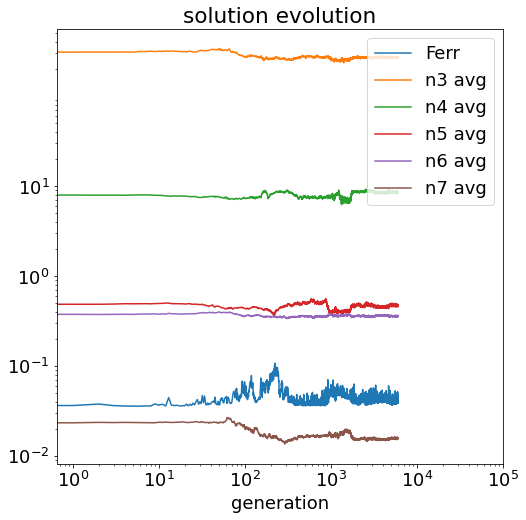

superheat (K), qppdata, qpppred, percentdif:
72.40704 6.6269 11.08682528526298 67.3003257218757
71.10017 8.4672 11.70269909000864 38.21214911669312
68.97078 10.02 12.807535677217471 27.819717337499718
66.61751 11.579 14.195923634992862 22.600601390386576
64.08479 13.376 15.922545482777648 19.03816898009606
60.74023 17.513 18.655237140884864 6.522224295579641
54.43071 28.068 25.736873231511403 -8.305282772155474
45.65994 41.091 42.28700452560514 2.9106240432336525
37.83159 46.072 65.31696728383683 41.77150391525618
31.28086 47.085 77.38753673409401 64.35709192756507
25.83957 42.897 68.6411687517566 60.013914147275095
21.364 36.914 53.30742969907994 44.40978950826228
17.69793 30.965 38.77540432929815 25.223330629091386
14.88374 23.28 27.335817700960774 17.42189734089679
12.66149 17.433 18.786814808260246 7.7658166021926585
10.85478 12.823 12.672393837791319 -1.1745002121865542
9.529446 9.447 8.898076728936648 -5.810556484210348
8.609713 7.042 6.693059840093603 -4.95512865530242
7.790826 

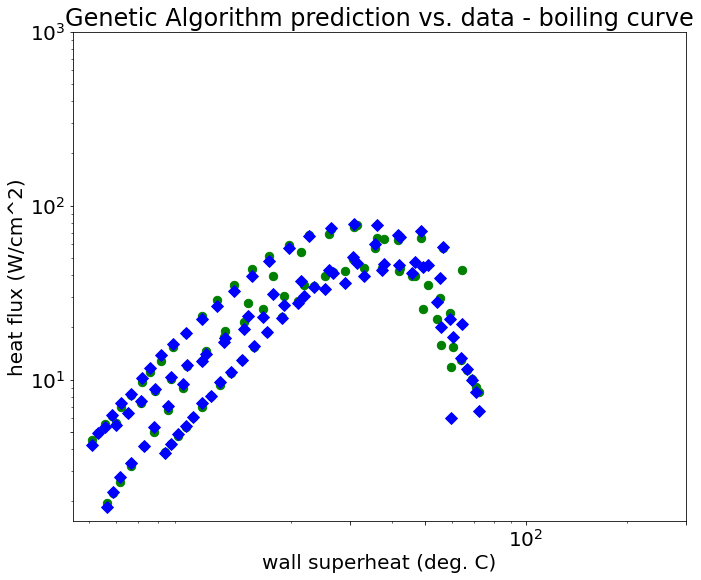

In [29]:
    # >>>>> ProtoGeneticSImBcurve_toUrsan -  HIGH SUPERHEAT
    #V.P. Carey 9/15/20

    #import math and numpy packages
import math
import numpy 

%matplotlib inline
# importing the required module 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas


#import copy
from copy import copy, deepcopy
# version 3 print function
from __future__ import print_function
# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)


    #INITIALIZE VARIABLES
    ydata = []
    lydata = []
    w = []
    wtemp = []
    gen=[0]

    w3avg = [0.0]
    w4avg = [0.0]
    w5avg = [0.0]
    w6avg = [0.0]
    w7avg = [0.0]

    meanAcost=[0.0]
    acostmeanavgw=[0.0] 
    ND = len(DF)      #number of data vectors in array
    DI = 3        #number of data items in vector
    NS = len(DF)       #total number of DNA strands
    NGEN = 6000      #number of generations (steps)
    MFRAC = 0.6
    #here the number of data vectors equal the number if DNA strands (organisms)
    # they can be different if they are randomly paired to compute cost (survivability) function
    for k in range(NGEN-1):
        gen.append(k+1)   # generation array
        meanAcost.append(0.0)
        acostmeanavgw.append(0.0)

        w3avg.append(0.0)
        w4avg.append(0.0)
        w5avg.append(0.0)
        w6avg.append(0.0)
        w7avg.append(0.0)

    #Set constants in postulated fit relation
    m1=4
    m2=13

    # DNA paramters initial guesses
    w0i =  -1

    w3i =  309.4702521
    w4i =  8.000210458
    w5i =  0.487535495
    w6i =  0.375671712647081
    w7i =  0.023422386

    #print data to confirm
    print ('data =', DF)

    #initialize lydata to have same margtic form as roriginal data above
    #need deepcopy since this array is a list(rows) of lists (column entries)
    lnq = deepcopy(DF)

    #now store log values for data
    for i in range(ND):
        lnq['q'][i]=math.log(DF['q'][i]+0.000000000010)
        lnq['q_'][i]=math.log(DF['q_'][i]+0.000000000010)


    #OK now have stored array of log values for data
    #Next - create array of DNA strands w[i] and wtemp[i] with dimesnion NS = 5

    #store array where rows are dna vectors 
    w =  [[-1., w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random(), w6i+0.0001*random(), w7i+0.0001*random()]]
    for i in range(ND):
        w.append([-1., w3i+0.0001*random(), w4i+0.0001*random(), w5i+0.0001*random(), w6i+0.0001*random(), w7i+0.0001*random()])

    # store also in wtemp
    wtemp = deepcopy(w)

    #initialize cost values
    cost =  [[0.0]]
    costavgw =  [[0.0]]
    acost =  [[0.0]]
    acostavgw =  [[0.0]]
    vcost =  [[0.0]]
    avcost =  [[0.0]]

    for i in range(ND-1):
        cost.append([0.0])
        acost.append([0.0])
        costavgw.append([0.0])
        acostavgw.append([0.0])
        vcost.append([0.0])
        avcost.append([0.0])

    acostmeanavgwMin=1000000000.0 

    w3min = 0.0
    w4min = 0.0
    w5min = 0.0
    w6min = 0.0
    w7min = 0.0

    acostta = 0.0

    w3ta = 0.0
    w4ta = 0.0
    w5ta = 0.0
    w6ta = 0.0
    w7ta = 0.0

    trat = 0.0

    #start of evolution loop, number of generations = NGEN
    # ----------------------
    for k in range(NGEN):

        #calculate costs
        for i in range(ND):
            #cost[i] = w[i][0]*lydata[i][0] + math.log(w[i][1]) + w[i][2]*lydata[i][1] 
            trat = (w[i][2]*(DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m1) + ((DF['dT'][i]*DF['k'][i]**w[i][4]*DF['theta'][i]**w[i][5]/w[i][1])**m2)
            cost[i] = -math.log(DF['alpha'][i]) -w[i][3]*math.log(1.00000001 + trat)

            acost[i] = abs(cost[i])/abs(lnq['q'][i])
        #-------------
        acostmean = numpy.mean(acost)
        acostmedian = numpy.median(acost)

    #pick survivors 
        clim = MFRAC*acostmedian  #cut off limit is a fraction MFRAC of median value for population
        nkeep = 0

        for j in range(NS):  # NS cost values, one for each strand
            #print('acost,clim=', acost[j],clim)
            if (acost[j] < clim):
                nkeep = nkeep + 1
                #wtemp[nkeep][0] = w[j][0];

                wtemp[nkeep-1][1] = w[j][1];
                wtemp[nkeep-1][2] = w[j][2];
                wtemp[nkeep-1][3] = w[j][3];
                wtemp[nkeep-1][4] = w[j][4];
                wtemp[nkeep-1][5] = w[j][5];

        # uncomment to print number kept this generation
        #print('nkeep=', nkeep)

        #now have survivors in leading entries in list of vectors from 1 to nkeep

        #compute number to be added by mating
        nnew = NS - nkeep  
        for j in range(nnew): 
            # pick two survivors randomly
            nmate1 = numpy.random.randint(low=0, high=nkeep+1)
            nmate2 = numpy.random.randint(low=0, high=nkeep+1)

            #then randomly pick DNA from parents for offspring

            # here, do not change property 0, it's just the -1 multiplier
            #if (numpy.random.rand() < 0.5)
            #    wtemp[nkeep+j+1][0] = w[nmate1][0]  % property 0
            #else
            #    wtemp[nkeep+j+1][0] = w[nmate2][0]


            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][1] = w[nmate1][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 3, mutation added
            else:
                wtemp[nkeep+j+1][1] = w[nmate2][1]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][2] = w[nmate1][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 4, mutation added
            else:
                wtemp[nkeep+j+1][2] = w[nmate2][2]*(1.+0.04*2.*(0.5-numpy.random.rand()))

            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][3] = w[nmate1][3]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][3] = w[nmate2][3]*(1.+0.04*2.*(0.5-numpy.random.rand()))
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][4] = w[nmate1][4]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][4] = w[nmate2][4]*(1.+0.04*2.*(0.5-numpy.random.rand()))
            if (numpy.random.rand() < 0.5):
                wtemp[nkeep+j+1][5] = w[nmate1][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))  # property 5, mutation added
            else:
                wtemp[nkeep+j+1][5] = w[nmate2][5]*(1.+0.04*2.*(0.5-numpy.random.rand()))

        # set w = wtemp
        w = deepcopy(wtemp)


        w3avg[k] = 0.0;
        w4avg[k] = 0.0;
        w5avg[k] = 0.0;
        w6avg[k] = 0.0;
        w7avg[k] = 0.0;


        for j in range(NS):  # NS cost values, one for each strand    
            w3avg[k] = w3avg[k] + w[j][1]/NS;
            w4avg[k] = w4avg[k] + w[j][2]/NS;
            w5avg[k] = w5avg[k] + w[j][3]/NS;
            w6avg[k] = w6avg[k] + w[j][4]/NS;
            w7avg[k] = w7avg[k] + w[j][5]/NS;


        #gen[k]=k
        meanAcost[k]=acostmean

        #calculate costs for averaged DNA values
        for i in range(ND):  

            #costavgw[i] = -1.*lydata[i][0] + math.log(w1avg[k]) + w2avg[k]*lydata[i][1]
            trat = (w4avg[k]*(DF['dT'][i]*DF['k'][i]**w6avg[k]*DF['theta'][i]**w7avg[k]/w3avg[k])**m1) + ((DF['dT'][i]*DF['k'][i]**w6avg[k]*DF['theta'][i]**w7avg[k]/w3avg[k])**m2)
            costavgw[i] = -math.log(DF['alpha'][i]) -w5avg[k]*math.log(1.00000001 + trat)

            acostavgw[i] = abs(costavgw[i])/abs(lnq['q'][i])

        #-------------

        acostmeanavgw[k] = numpy.mean(acostavgw)

        if (acostmeanavgw[k] < acostmeanavgwMin):
            acostmeanavgwMin = acostmeanavgw[k] 
            w3min = w3avg[k]
            w4min = w4avg[k]
            w5min = w5avg[k]
            w6min = w6avg[k]
            w7min = w7avg[k]

        acostta = acostta + acostmeanavgw[k]/NGEN
        if (k > 800):
            w3ta = w3ta + w3avg[k]/(NGEN-800)
            w4ta = w4ta + w4avg[k]/(NGEN-800)
            w5ta = w5ta + w5avg[k]/(NGEN-800)
            w6ta = w6ta + w6avg[k]/(NGEN-800)
            w7ta = w7ta + w7avg[k]/(NGEN-800)

        #print('avg w1-w5:', w1avg[k], w2avg[k], w3avg[k], w4avg[k], w5avg[k], acostmeanavgw[k])
        kvalue = k

        #end of evolution loop
        # ----------------------
        # ----------------------

    #final print and plot of results
    print('ENDING:     avg w3-w7,acostmean:', w3avg[k], w4avg[k], w5avg[k], w6avg[k], w7avg[k], acostmeanavgw[k])
    print('MINUMUM:    min w3-w7,acostmean:', w3min, w4min, w5min, w6min, w7min, acostmeanavgwMin)
    print('TIME AVG:  timeavg w3-w7,acostmean:', w3ta, w4ta, w5ta, w6ta, w7ta, acostta)

#plotting n3, n4, n5, n6, and Ferr from the genetic algorithme
    plt.rcParams.update({'font.size': 18})
    #plt.plot(gen, meanAcost) 
    plt.plot(gen, acostmeanavgw)
    plt.plot(gen, w3avg)
    plt.plot(gen, w4avg)
    plt.plot(gen, w5avg)
    plt.plot(gen, w6avg)
    plt.plot(gen, w7avg)

    #plt.rcParams.update({'font.size': 12})
    plt.legend(['Ferr', 'n3 avg', 'n4 avg', 'n5 avg', 'n6 avg', 'n7 avg'], loc='upper right')
    # naming the x axis 
    plt.xlabel('generation') 
    plt.loglog()
    plt.yticks([0.01,0.1,1.0,10])
    plt.xticks([1,10,100,1000,10000,100000])

    # uncomment next line to give a title to the graph 
    plt.title('solution evolution') 
    # function to show the plot 
    plt.show()   #TO HERE ***********************

    #initialize values
    qpppredA =  [[0.0]]
    qpppredM =  [[0.0]]
    qppdataA =  [[0.0]]
    pdifA = [[0.0]]
    shData = [[0.0]]
    for i in range(0,ND-1):
        qpppredA.append([0.0])
        qppdataA.append([0.0])
        qpppredM.append([0.0])
        pdifA.append([0.0]) 
        shData.append([0.0])

    #calculate predicted and data values to print and plot
    print('superheat (K), qppdata, qpppred, percentdif:')
    meanAbspdifA = 0.0
    for i in range(0, ND):
        trat = 1.0 + (w4ta*(DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m1) + ((DF['dT'][i]*DF['k'][i]**w6ta*DF['theta'][i]**w7ta/w3ta)**m2)
        qpppredA[i] = DF['n1'][i]*(DF['dT'][i]**DF['n2'][i])/(trat**w5ta)
        trat = 1.0 + (w4min*(DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m1) + ((DF['dT'][i]*DF['k'][i]**w6min*DF['theta'][i]**w7min/w3min)**m2)
        qpppredM[i] = DF['n1'][i]*(DF['dT'][i]**DF['n2'][i])/(trat**w5min)
        qppdataA[i] = DF['q'][i]
        shData[i] = DF['dT'][i]
        pdifA[i] = 100.*(qpppredA[i]-qppdataA[i])/qppdataA[i]
        print(DF['dT'][i],DF['q'][i], qpppredA[i], pdifA[i])
        meanAbspdifA = meanAbspdifA + abs(pdifA[i]/22.)
    print ('meanAbspdifA = ', meanAbspdifA)

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(11,9))
    #plt.scatter(shData, qpppredA, s=70, color='red')
    plt.scatter(shData, qpppredM, s=70, color='green')
    plt.scatter(shData, qppdataA, s=70, color='blue', marker='D')
    #plt.legend(['A'], loc='lower center')
    plt.title('Genetic Algorithm prediction vs. data - boiling curve')
    plt.xlabel('wall superheat (deg. C)')
    plt.ylabel('heat flux (W/cm^2)')
    plt.loglog()
    plt.yticks([5.,10.,100.,1000.])
    plt.xticks([30.,50.,100.,300.])
    plt.show()